# Prepare a classification model using Naive Bayes for salary data**

#Data Description**

age -- age of a person

workclass -- A work class is a grouping of work

education -- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation -- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv(r"E:\assignments csv  files\SalaryData_Train(1).csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test=pd.read_csv(r"E:\assignments csv  files\SalaryData_Test(1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
#concatenate Train and Test datasets
salary = train.append(test)
salary.reset_index(inplace=True)
salary = salary.drop(['index'], axis=1) 
salary.tail()

C:\Users\hp\AppData\Local\Temp\ipykernel_9120\2159289710.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary = train.append(test)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
45220,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [5]:
salary.shape

(45221, 14)

In [6]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [8]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
#categorical feature
categorical_feature=[feature for feature in salary.columns if salary[feature].dtype=="O"]
categorical_feature

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [11]:
numerical_feature=[feature for feature in salary.columns if salary[feature].dtype!="O"]
numerical_feature

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [12]:
discrete_feature = [feature for feature in numerical_feature if len(salary[feature].unique())<25]
print('discrete features:', discrete_feature, '\n')

continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print('continuous features:', continuous_feature, '\n')

discrete features: ['educationno'] 

continuous features: ['age', 'capitalgain', 'capitalloss', 'hoursperweek'] 



In [13]:
for feature in categorical_feature:
  print(salary[feature].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [14]:
for feature in categorical_feature:
  print(feature, "has", len(salary[feature].unique()), "label")

workclass has 7 label
education has 16 label
maritalstatus has 7 label
occupation has 14 label
relationship has 6 label
race has 5 label
sex has 2 label
native has 40 label
Salary has 2 label


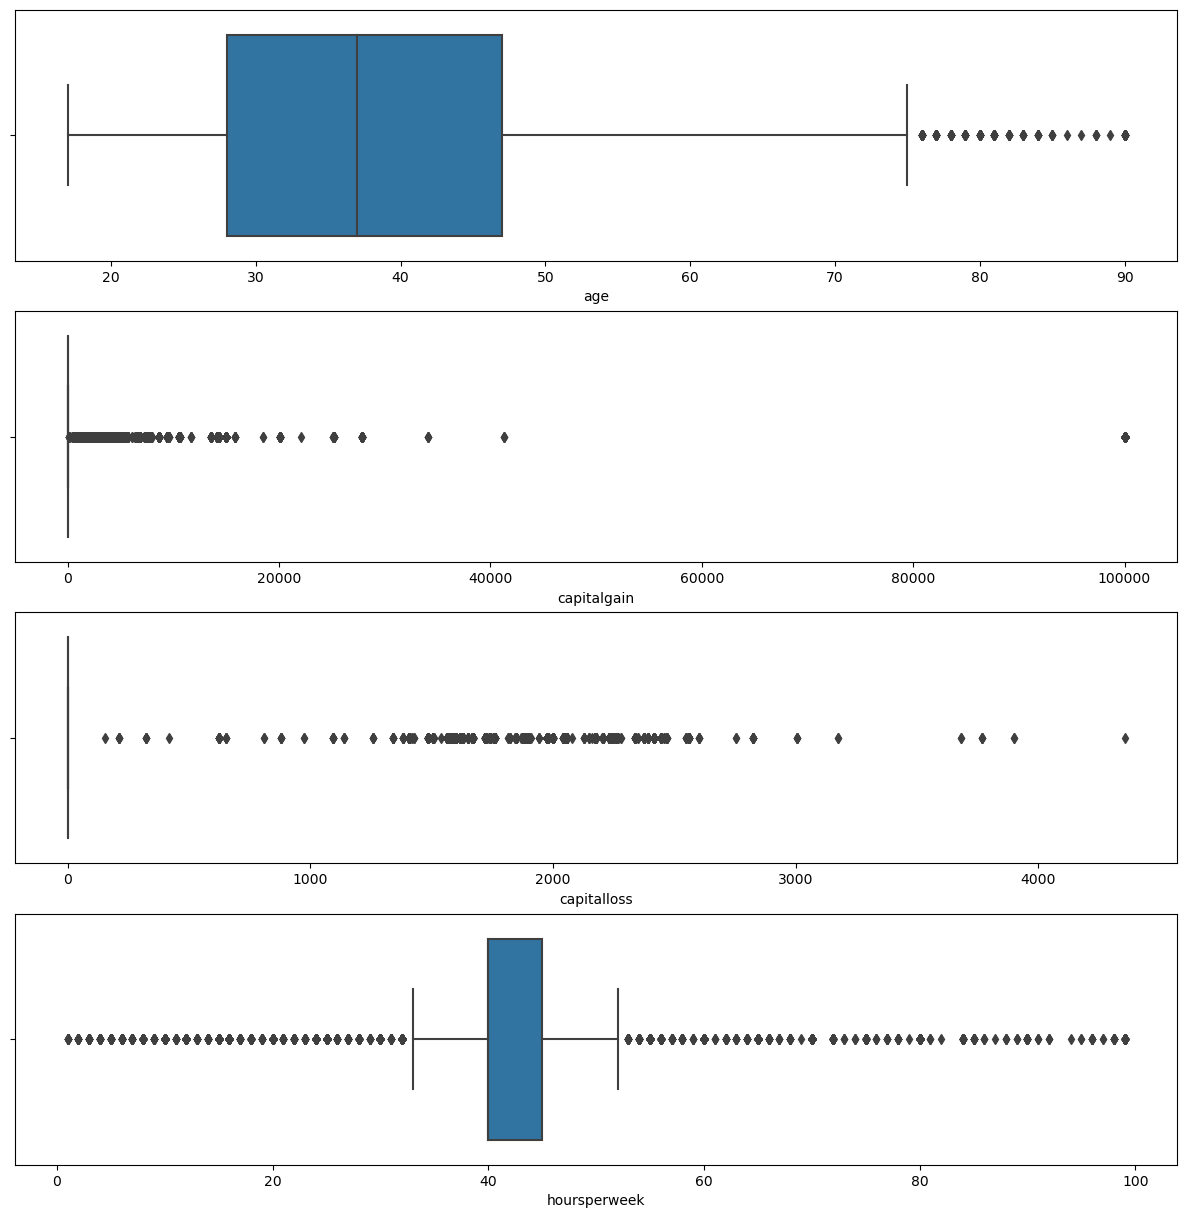

In [15]:
#outliers in continuous variable
fig,ax=plt.subplots(len(continuous_feature),1,figsize=(15,15))

for i in range(0,len(continuous_feature)):
  sns.boxplot(x=continuous_feature[i],ax=ax[i],data=salary)

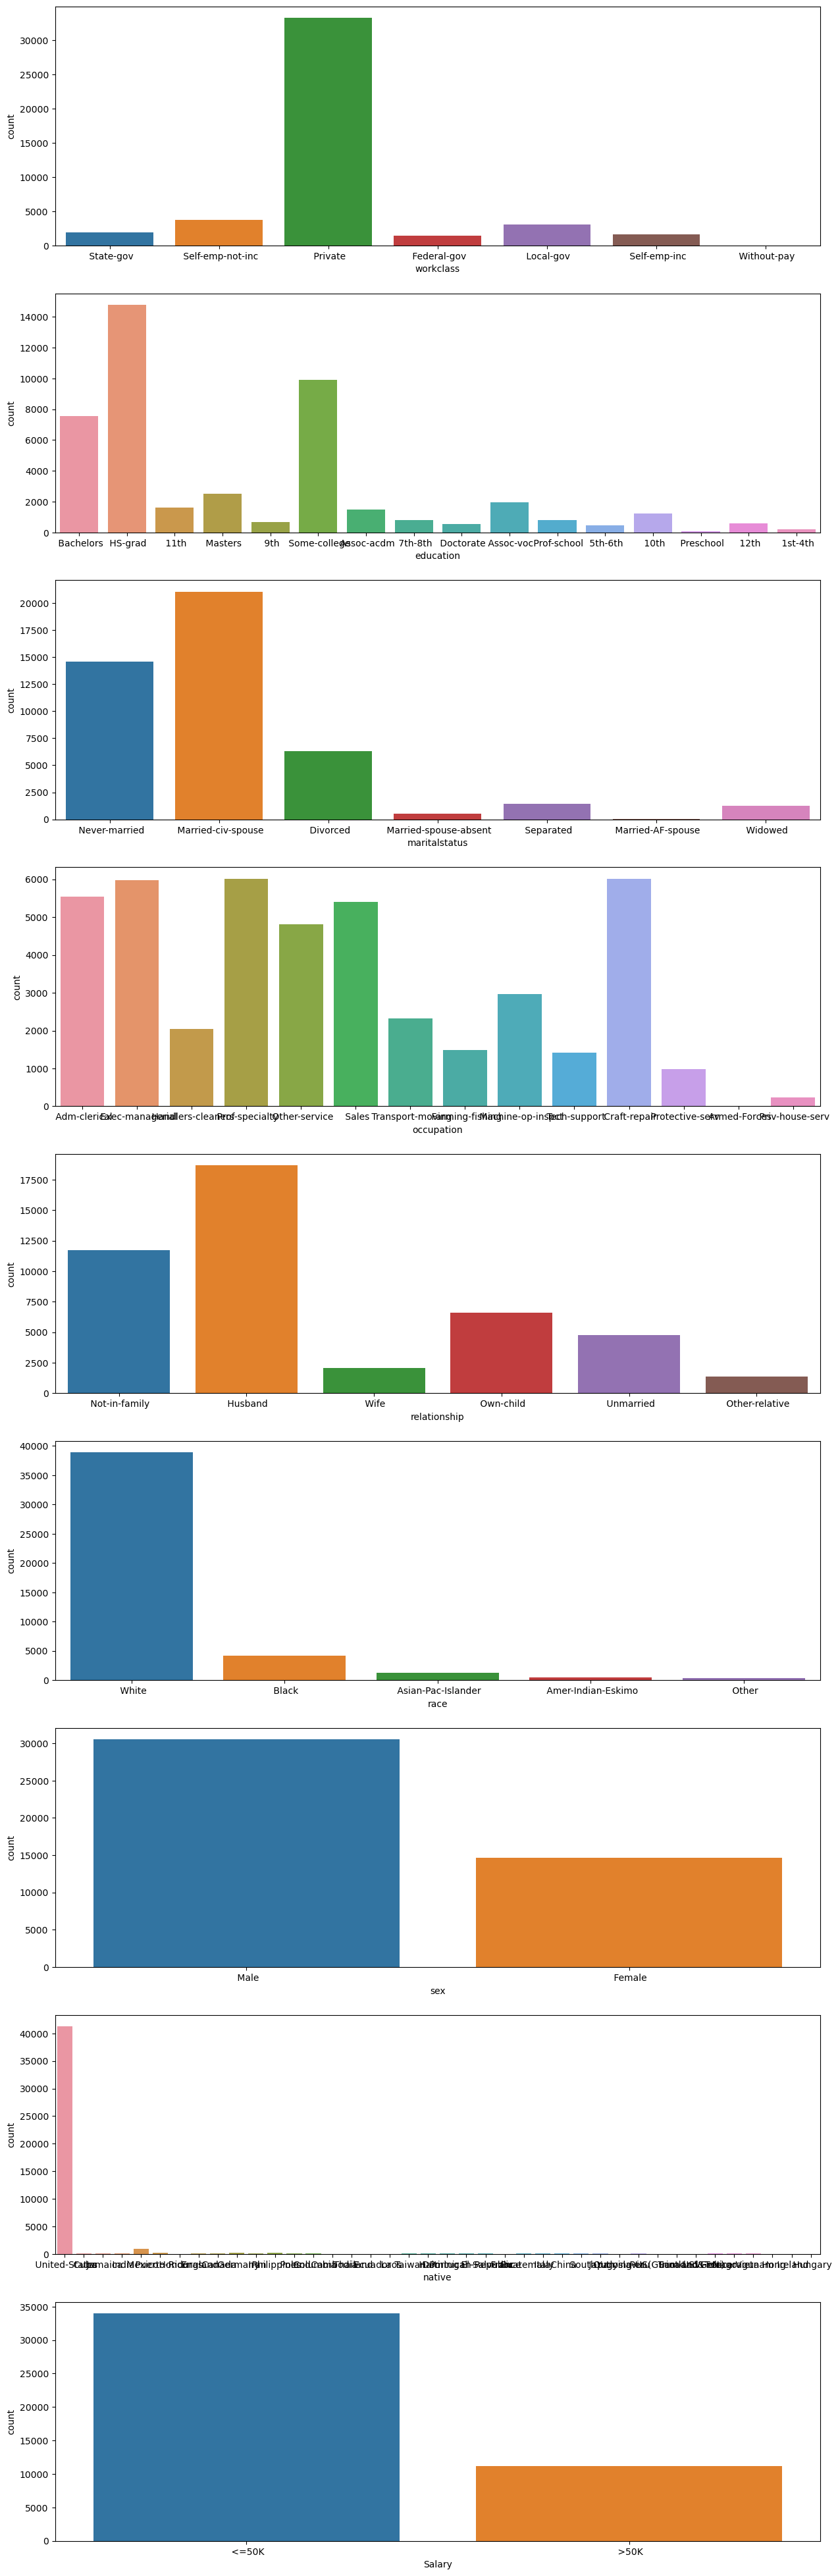

In [16]:
#for categorical_feature box plot
fig,ax=plt.subplots(len(categorical_feature),1,figsize=(15,50))

for i in range(0,len(categorical_feature)):
  sns.countplot(x=categorical_feature[i],ax=ax[i],data=salary)

In [17]:
salary_more_than_50=pd.DataFrame()
salary_less_than_50=pd.DataFrame()

salary_more_than_50 = salary.loc[salary['Salary']==' >50K']

salary_less_than_50 = salary.loc[salary['Salary']==' <=50K']


salary.shape



(45221, 14)

In [18]:
(salary_less_than_50.shape[0] + salary_more_than_50.shape[0]) ==salary.shape[0]

True

In [63]:
#Age distribution wrt salary**

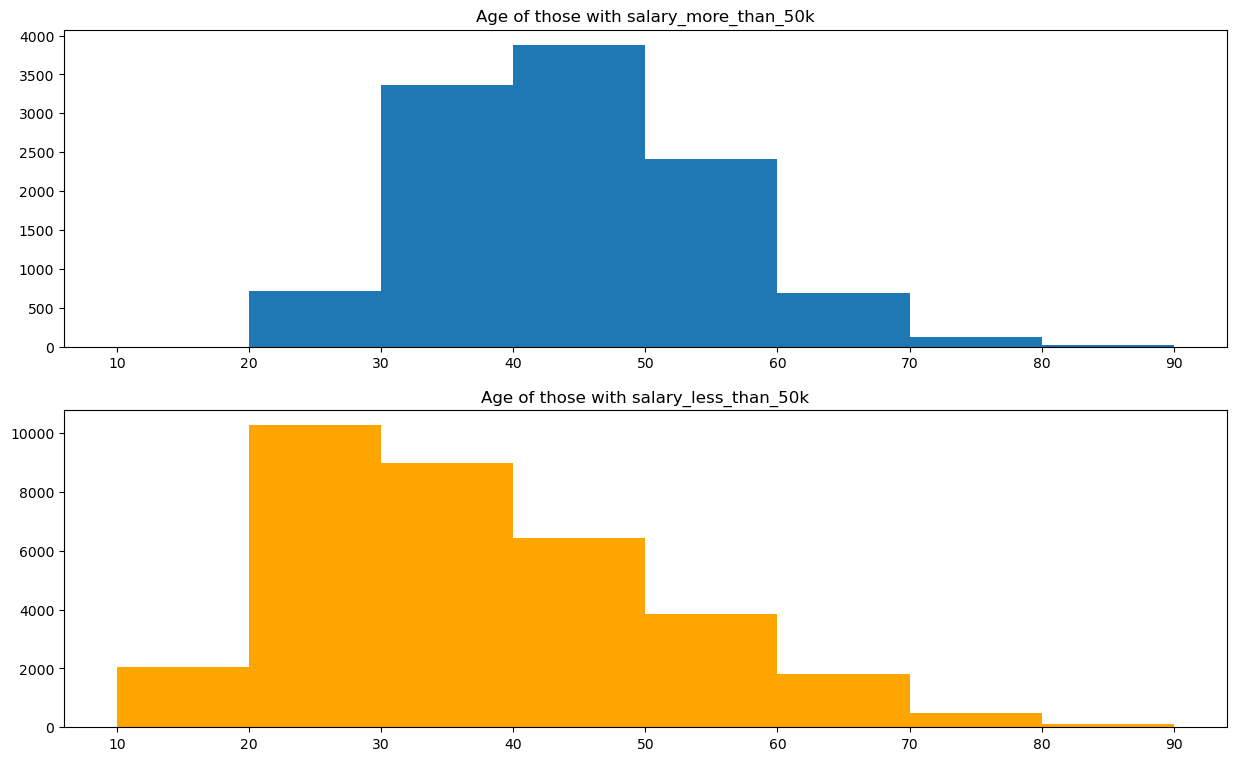

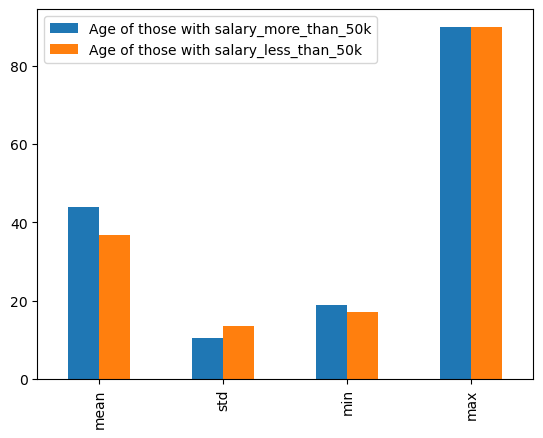

In [20]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.age, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.age, color = "orange", bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age of those with salary_less_than_50k')


age_describe = pd.DataFrame()

age_describe['Age of those with salary_more_than_50k'] = salary_more_than_50['age'].describe()
age_describe['Age of those with salary_less_than_50k'] = salary_less_than_50['age'].describe()

age_describe  = age_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
age_describe.plot.bar()

plt.show() 

In [21]:
Insight:

Age of those with salary more than 50K: Most of the people are in the age group of 30 - 50 and no one is below 20yrs

Age of those with salary less than 50K: As age increases, no of people are decreasing

SyntaxError: invalid decimal literal (3866539259.py, line 3)

In [64]:
#Hours/week distribution wrt salary

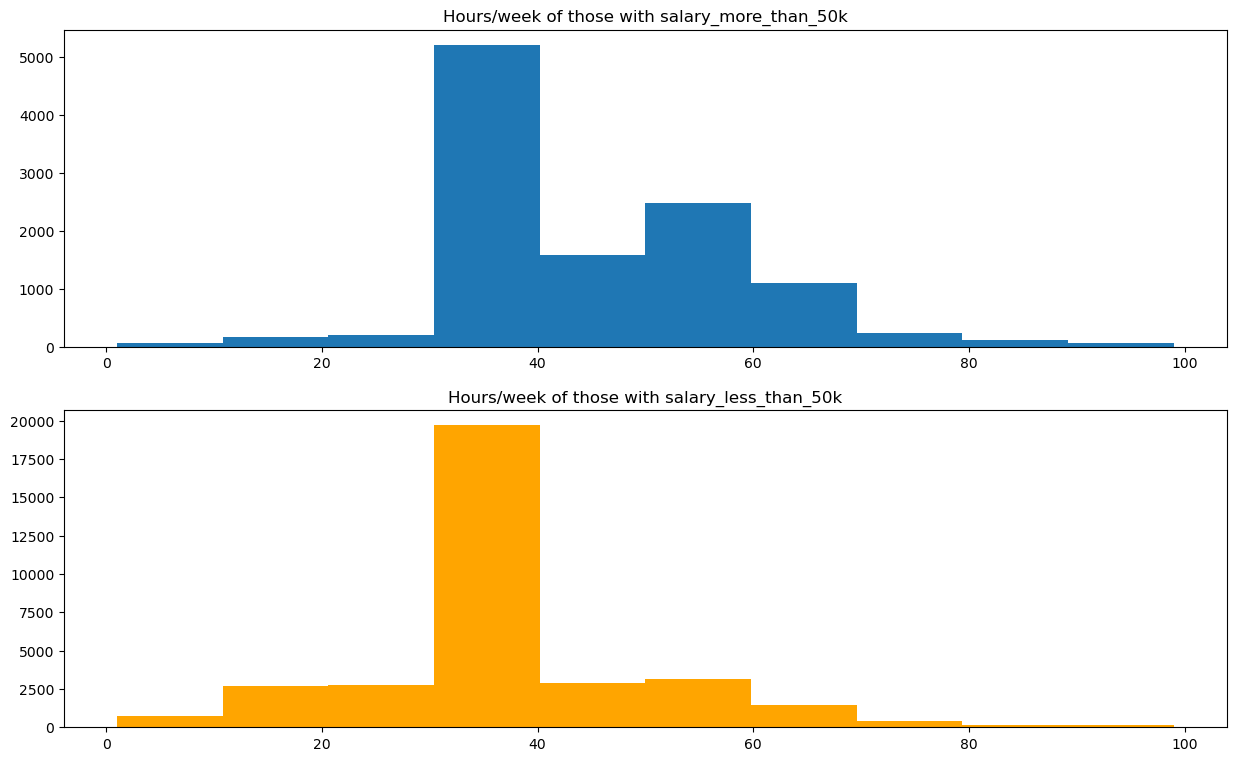

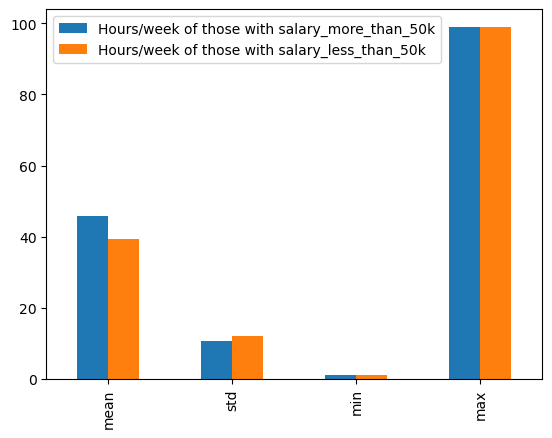

In [23]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.hoursperweek)
plt.title('Hours/week of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.hoursperweek, color = "orange")
plt.title('Hours/week of those with salary_less_than_50k')


Hoursweek_describe = pd.DataFrame()

Hoursweek_describe['Hours/week of those with salary_more_than_50k'] = salary_more_than_50['hoursperweek'].describe()
Hoursweek_describe['Hours/week of those with salary_less_than_50k'] = salary_less_than_50['hoursperweek'].describe()

Hoursweek_describe = Hoursweek_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
Hoursweek_describe.plot.bar()

plt.show()

In [65]:
#Capital Gains distribution wrt salary

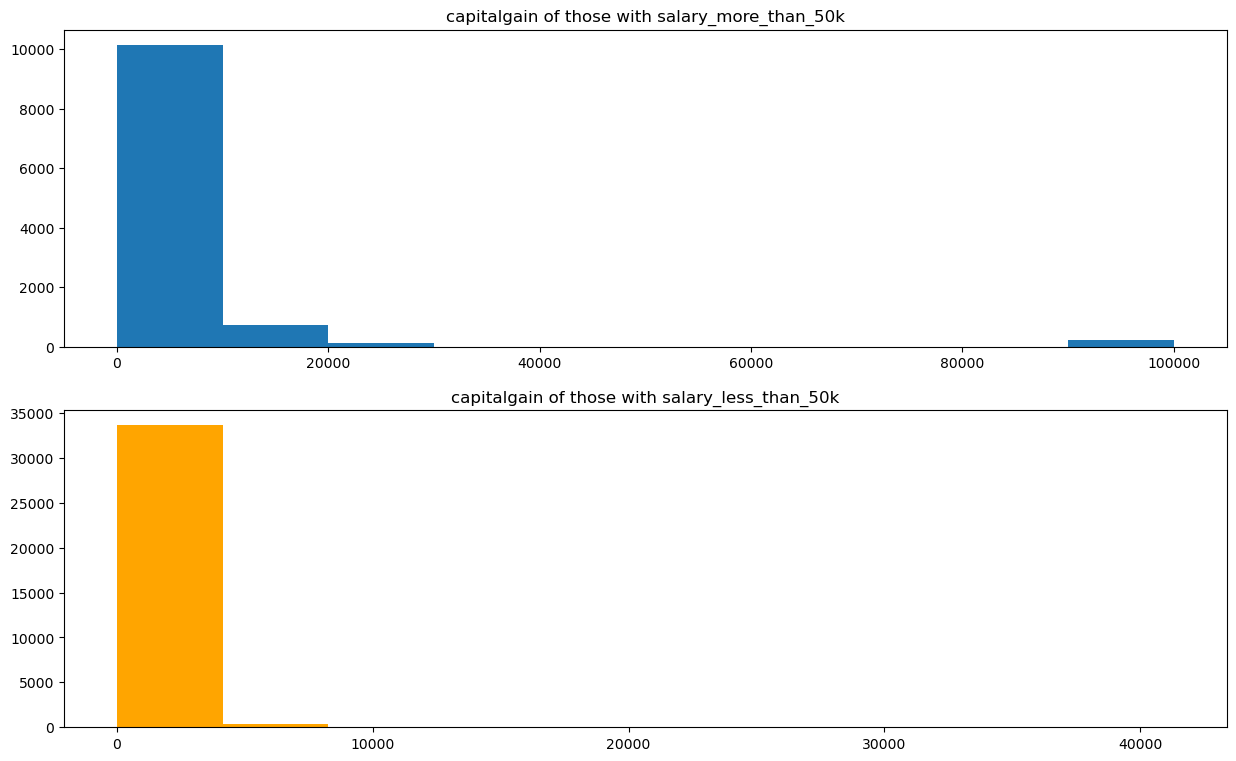

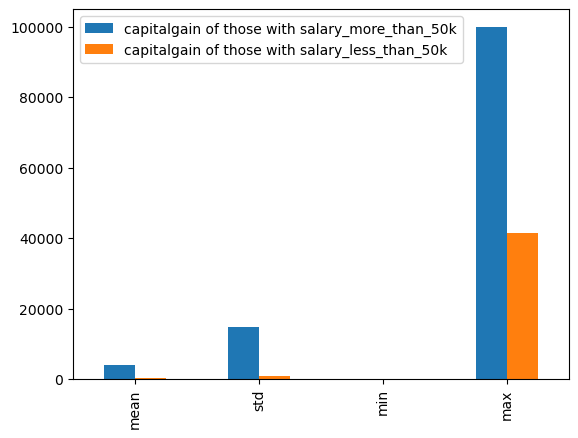

In [25]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.capitalgain)
plt.title('capitalgain of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.capitalgain, color = "orange")
plt.title('capitalgain of those with salary_less_than_50k')


capitalgain_describe = pd.DataFrame()

capitalgain_describe['capitalgain of those with salary_more_than_50k'] = salary_more_than_50['capitalgain'].describe()
capitalgain_describe['capitalgain of those with salary_less_than_50k'] = salary_less_than_50['capitalgain'].describe()

capitalgain_describe = capitalgain_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
capitalgain_describe.plot.bar()

plt.show() 

In [66]:
#Capital Loss distribution wrt salary

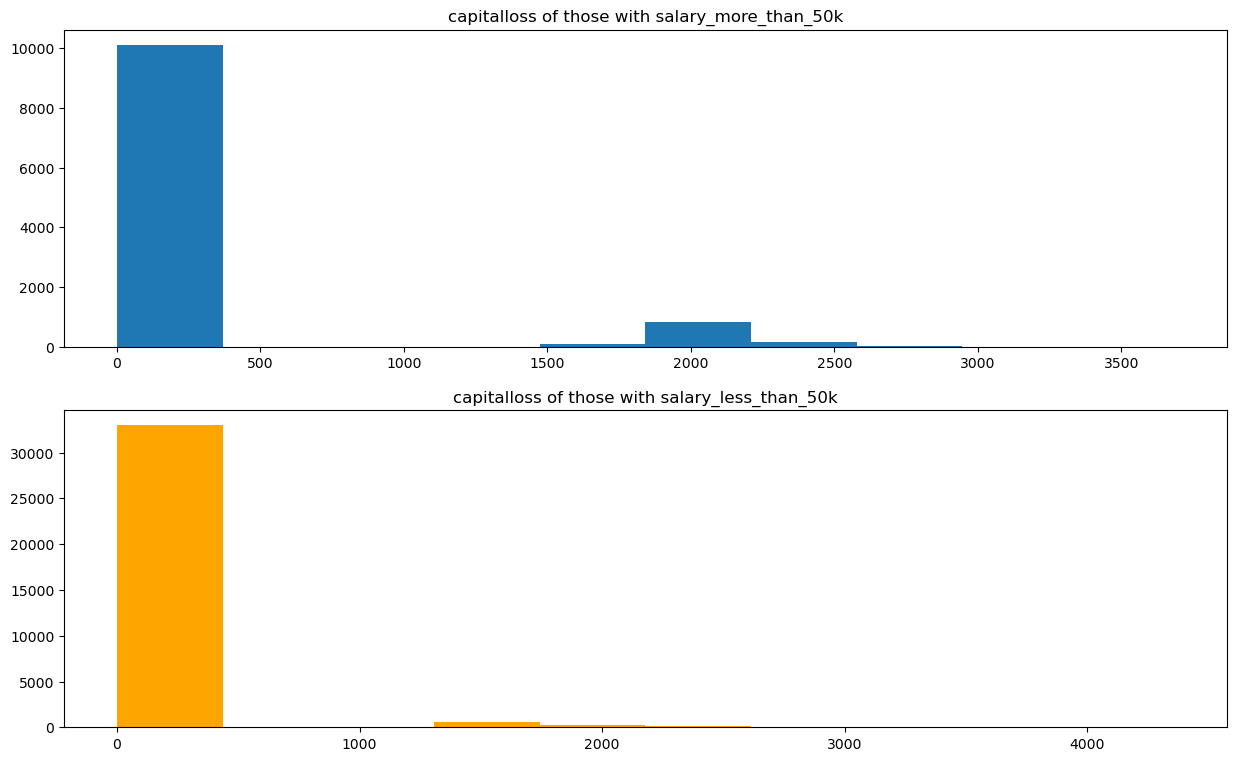

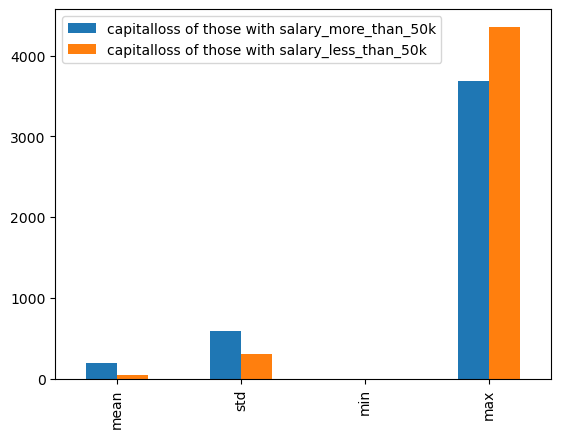

In [27]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.capitalloss)
plt.title('capitalloss of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.capitalloss, color = "orange")
plt.title('capitalloss of those with salary_less_than_50k')


capitalloss_describe = pd.DataFrame()

capitalloss_describe['capitalloss of those with salary_more_than_50k'] = salary_more_than_50['capitalloss'].describe()
capitalloss_describe['capitalloss of those with salary_less_than_50k'] = salary_less_than_50['capitalloss'].describe()

capitalloss_describe = capitalloss_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
capitalloss_describe.plot.bar()

plt.show() 
     

# Insight:

Majority of both the groups is employed in private sectors

As educational qualification decreases, no. of people in group of 'salary more than 50k' reduces.

Majority of people having salary more than 50k are married, whereas very small proportion of them is never married, divorced, widow, separated. Significant proportion of people having salary less than 50k are never married, divorced, widow, separated.


Insignificant amount of non natives are having salary more than 50kMost of the people having salary less than 50k are engaged in manual and low skilled work like craft repair, clerk, transport, machine inspection, farming fishing, handlers cleaners and other services. Whereas people having salary more than 50k are in high skilled works like managers, professors, sales


In [33]:
#Data Pre-Processing**

In [34]:
salary1=salary.copy()
salary1=salary1.drop("Salary",axis=1)

In [35]:
salary1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [36]:
salary1=pd.get_dummies(salary1)
salary1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
salary1["Salary1"]=salary.Salary
salary1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary1
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
salary1.Salary1=encoder.fit_transform(salary1.Salary1)
salary1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary1
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
train.shape

(30161, 14)

In [40]:
test.shape

(15060, 14)

In [41]:
train_set=salary1.iloc[:30161,:]
test_set=salary1.iloc[30161:,:]

In [42]:
print("shape of the dataframe-{} {}".format(train_set.shape,test_set.shape))

shape of the dataframe-(30161, 103) (15060, 103)


In [43]:
train_set

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary1
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
test_set

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary1
30161,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30162,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30163,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
30164,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30165,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
x_train=train_set.iloc[:,:102]
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
y_train=train_set.iloc[:,102]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary1, Length: 30161, dtype: int32

In [47]:
x_test=test_set.iloc[:,:102]
x_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
30161,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30162,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30163,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30164,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30165,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
y_test=test_set.iloc[:,102]
y_test

30161    0
30162    0
30163    1
30164    1
30165    0
        ..
45216    0
45217    0
45218    0
45219    0
45220    1
Name: Salary1, Length: 15060, dtype: int32

In [49]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (30161, 102)
y_train (30161,)
x_test (15060, 102)
y_test (15060,)


# Naive Bayes Classifier

There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report as report 

In [73]:
#instantiating the object
model_BNB = BernoulliNB()

#fit the model
model_BNB.fit(x_train, y_train)

#prediction
y_pred_BNB = model_BNB.predict(x_test)

#Accuracy
#first argument is true values, second argument is predicted values
print('BernoulliNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_BNB)))

BernoulliNB Model accuracy score: 0.7598


In [74]:
#instantiating the object
model_CNB = CategoricalNB()

#fit the model
model_CNB.fit(x_train, y_train)

#prediction
y_pred_CNB = model_CNB.predict(x_test)

#Accuracy
#first argument is true values, second argument is predicted values
print('Categorical Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_CNB)))

Categorical Model accuracy score: 0.8297


In [75]:
from sklearn.metrics import confusion_matrix as cm 

y_pred_CNB = model_CNB.predict(x_test)
print(cm(y_test,y_pred_CNB)) 

[[9750 1610]
 [ 954 2746]]


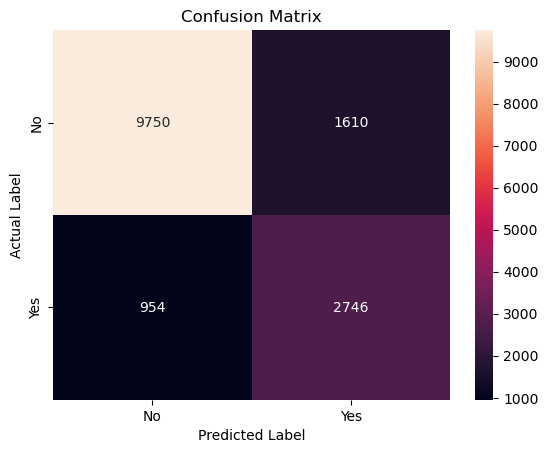

In [60]:
cm_df=cm(y_test, y_pred_CNB)
class_label = ["No", "Yes"]

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

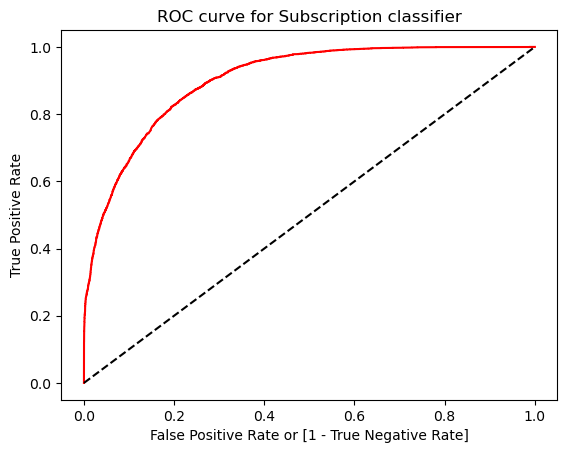

AUC-ROC Score: 0.8002184050247431


In [61]:
# ROC Curve plotting and finding AUC value

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model_CNB.predict_proba (x_test)[:,1])
auc = roc_auc_score(y_test, y_pred_CNB)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc) 

In [62]:
print('Training set score: {:.2f}%'.format(model_CNB.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model_CNB.score(x_test, y_test)*100))

Training set score: 83.09%
Test set score: 82.97%
